In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Updated Archive Data

- The Raw dataset from the Archive contained information about 681'835 archived video items stored in 13 columns

Initial columns:
    
    'Sendedatum'

    'Prg-Id'
    'Item-Id'
    'Item-Titel'
    'Item-Abstract'
    'Deskriptoren'
    'Deskriptoren-Pfad'
    'Personen',

    'Program-WebCmsId'
    'Item-WebCmsId'
    'Web-Titel'
    'Web-Lead'
    'Web-Description'

- In order to reach the goal of this project it was decided to keep only video Items which are part of the SRF online portfolio.
- Therefore, all items without Play-SRF identifier or those where the information was not up to date have been removed.
- In order to do so all items have been checked against the actual metadata available online (srf.ch/play) and the metadata was updated where this was necessary.
- The remaining cleaned and filtered dataset contains 135'741 rows and 15 columns

New columns (updated web information): 

    'title' 
    'lead'

- The video items available where mostly published after 2009-01-01


 





In [176]:
df_faro_clean = pd.read_pickle('../Daten/FINAL_il_data_play_srf_v2.pkl')

In [177]:
df_faro_clean.head()

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead
0,00D32669-925D-4D33-B876-62CA2EE36EC5,2023-09-01,AE73357D-C460-4E34-978A-3BDFDC677DB3,Kurznachrichten Wirtschaft,China: Die Immobilien-Krise hat auch Auswirkun...,SRF Börse vom 01.09.2023,Chinas Immobilienkrise spitzt sich zu. Betroff...,NaN,IMMOBILIENBRANCHE,¦GEWERBE.¦IMMOBILIENBRANCHE¦,91E2FEBE-8E1F-4E39-A492-F1DAF7F49743,24B5D313-B0D3-4C87-88E1-B876DFE1A1B0,SRF Börse vom 01.09.2023,Chinas Immobilienkrise spitzt sich zu. Betroff...
1,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,910284E0-E09D-40DD-A7E8-DE48684ED259,Neues russisches Geschichtsbuch legitimiert Uk...,Russland: Einführung neues russisches Schulbuc...,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,NaN,KRIEG SCHULE,¦STAAT UND POLITIK.¦KRIEG¦ ¦BILDUNG.¦SCHULE¦,2138EBA9-4A83-4874-A95F-05B7A05DE714,EE05756E-641C-4442-B585-CDF18239202E,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...
2,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,0CBD79FF-FED0-4D94-B5B0-F715F625EE55,Häftlinge halten Gefängnispersonal als Geiseln...,Ecuador: In 6 Gefängnissen halten Häftlinge Wä...,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,NaN,UNRUHEN GEFÄNGNIS,¦STAAT UND POLITIK.¦UNRUHEN¦ ¦JUSTIZ.¦STRAFVOL...,316A3995-C4BF-4333-AC51-E8621D63C151,EE05756E-641C-4442-B585-CDF18239202E,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...
3,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,ABEE4AE4-2667-4CE7-A43A-7BF0B39DD147,Neues Datenschutzgesetz in Kraft,Schweiz: Mit dem revidierten Datenschutzgesetz...,Neues Datenschutzgesetz in Kraft,Krankenkasse Treueprogramme oder Zugfahrten: ...,NaN,GESETZ DATENSCHUTZ,¦JUSTIZ.¦GESETZ¦ ¦JUSTIZ.¦PERSÖNLICHKEITSSCHUT...,408E7B78-58C8-4C1B-B6D4-32C1FD277C9C,EE05756E-641C-4442-B585-CDF18239202E,Neues Datenschutzgesetz in Kraft,"Krankenkasse, Treueprogramme oder Zugfahrten: ..."
4,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,8F41D6A2-D66B-4260-AEFB-94F1AE4E4E28,Rentenreform in Frankreich in Kraft,Frankreich: Nach monatelangen Protesten gilt n...,Rentenreform in Frankreich in Kraft,Nach monatelangen Protesten gilt in Frankreich...,NaN,GEWERKSCHAFT PENSIONIERUNG,¦ARBEIT.¦SOZIALPARTNERSCHAFT¦GEWERKSCHAFT¦ ¦AR...,88DCB1FA-EE0A-4E40-AA0A-12269FDC7BDD,EE05756E-641C-4442-B585-CDF18239202E,Rentenreform in Frankreich in Kraft,Nach monatelangen Protesten gilt in Frankreich...


In [178]:
test = df_faro_clean.copy()
test['Web-Titel'] = test['Web-Titel'].str.replace('  ', ', ')
test['Web-Lead'] = test['Web-Lead'].str.replace('  ', ', ')

test_ = test[test['Web-Titel']!=test['title']].sample(1).transpose()
test_.to_clipboard()
test_

,118279
Prg-Id,5476DE54-0B16-4CF6-B4B8-6FE296724B2E
Sendedatum,2021-06-18 00:00:00
Item-Id,13B5C3D4-FFB9-4457-BAEE-A02D74C6AF5B
Item-Titel,Echte Tierhelden (5/6)
Item-Abstract,Schweiz: Porträts von Menschen und deren Einri...
Web-Titel,Vergnügliche Spielstunden des Affenbabys Gery
Web-Lead,"Die Tatkraft der Menschen, die sich für Tiere ..."
Web-Description,In insgesamt sechs Folgen erzählt «SRF bi de L...
Deskriptoren,TIERHALTUNG VETERINÄRMEDIZIN TIERSCHUTZ
Deskriptoren-Pfad,¦LANDWIRTSCHAFT.¦TIERHALTUNG¦ ¦LANDWIRTSCHAFT....


<ipython-input-179-b00056ddccff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upload_year['count'] = 1


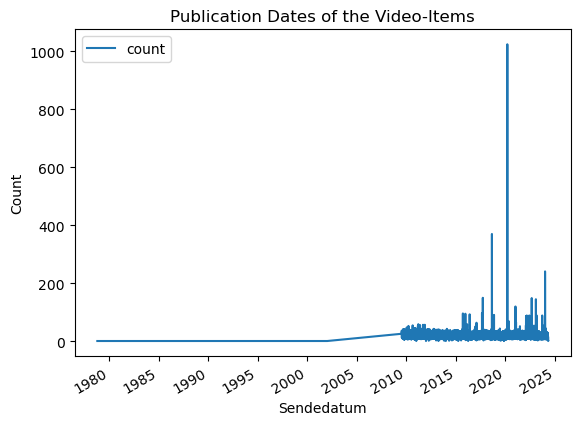

In [179]:
df_upload_year = df_faro_clean[['Sendedatum']]
df_upload_year['count'] = 1
df_upload_year.groupby('Sendedatum').sum()


# Plot the results
df_upload_year.groupby('Sendedatum').sum().plot()
plt.title('Publication Dates of the Video-Items')
#plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

#### Filter out old videos (outliers)

In [180]:
df_faro_clean[df_faro_clean['Sendedatum']<='2009-01-01'].shape

(8, 14)

In [181]:
df_faro_clean = df_faro_clean[df_faro_clean['Sendedatum']>='2009-01-01']

## Split Sachdeskriptoren

- Because of data quality was not perfect in the initial dataset and in order to keep all the hierarchical information available in the 'Sachdeskriptor' it was decided to extract the tags step by step from scratch

In [182]:
df_faro_clean['Deskriptoren-Pfad-Split'] = df_faro_clean['Deskriptoren-Pfad'].str.replace('¦ ', '¦---')
df_faro_clean['Deskriptoren-Pfad-Split'] = df_faro_clean['Deskriptoren-Pfad-Split'].str.split('---')

In [183]:
df_faro_clean['Deskriptoren-Pfad-Split']

0                            [¦GEWERBE.¦IMMOBILIENBRANCHE¦]
1           [¦STAAT UND POLITIK.¦KRIEG¦, ¦BILDUNG.¦SCHULE¦]
2         [¦STAAT UND POLITIK.¦UNRUHEN¦, ¦JUSTIZ.¦STRAFV...
3         [¦JUSTIZ.¦GESETZ¦, ¦JUSTIZ.¦PERSÖNLICHKEITSSCH...
4         [¦ARBEIT.¦SOZIALPARTNERSCHAFT¦GEWERKSCHAFT¦, ¦...
                                ...                        
127293    [¦UMWELT.¦GEWÄSSER¦SEE¦, ¦UMWELT.¦UMWELT¦NATUR...
127294    [¦LANDWIRTSCHAFT.¦LANDWIRTSCHAFT¦, ¦UMWELT.¦UM...
127295    [¦STAAT UND POLITIK.¦POLITIK¦, ¦GESUNDHEIT.¦KR...
127296    [¦STAAT UND POLITIK.¦POLIZEI¦, ¦STRAFTAT.¦GEWA...
127297    [¦STAAT UND POLITIK.¦KRIEG¦, ¦INDUSTRIE.¦RÜSTU...
Name: Deskriptoren-Pfad-Split, Length: 127288, dtype: object

### Explode DataFrame

- Because one item can contain more than one 'Sachdeskriptor' the dataset had to be exploded first - resulting in a dataset with one 'Sachdeskriptor' for each row (and duplicated video items)

In [184]:
df_faro_expl = df_faro_clean.explode('Deskriptoren-Pfad-Split').reset_index(drop=True)

In [185]:
df_faro_expl.shape

(261689, 15)

### Check for multiple values

In [186]:
df_faro_expl[(df_faro_expl['Deskriptoren-Pfad-Split'].isna())]

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split


In [187]:
df_faro_expl[df_faro_expl['Item-Id'].fillna('').str.contains(',')]

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split


In [188]:
df_faro_expl[df_faro_expl['Program-WebCmsId'].fillna('').str.contains(',')]

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split


In [189]:
df_faro_expl[df_faro_expl['Item-WebCmsId'].fillna('').str.contains(',')]

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split


### Split Deskriptoren-Pfad in Levels

In [190]:
def parse_levels(row):
    """
    Simple function to slpit the 'Sachdeskriptoren' into theyr hierarchical structure
    returns: part 1 - n for every 'Sachdeskriptor' where n is the available depth of the hierarchy per item (max depth is 4)
    """
    if isinstance(row, str):
        # Check if the string starts and ends with '¦'
        if (row.startswith('¦') and row.endswith('¦')):

            # Split the string by '¦' and remove empty strings
            parts = [part for part in row.split('¦') if part]

            # Check if the first element is properly formatted
            if len(parts) > 1 and parts[0].endswith('.'):

                # Return the levels
                return parts

In [191]:
df_faro_expl['Deskriptoren-Pfad-Split-Level'] = df_faro_expl['Deskriptoren-Pfad-Split'].apply(parse_levels)

In [192]:
df_faro_expl['Deskriptoren-Pfad-Split-Level'].dropna().apply(len).max()

4

In [193]:
df_faro_expl[['descriptor_lvl_1', 'descriptor_lvl_2', 'descriptor_lvl_3', 'descriptor_lvl_4']] = df_faro_expl['Deskriptoren-Pfad-Split-Level'].apply(pd.Series, dtype='object')

In [238]:
df_faro_expl.head()

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split,Deskriptoren-Pfad-Split-Level,descriptor_lvl_1,descriptor_lvl_2,descriptor_lvl_3,descriptor_lvl_4
0,00D32669-925D-4D33-B876-62CA2EE36EC5,2023-09-01,AE73357D-C460-4E34-978A-3BDFDC677DB3,Kurznachrichten Wirtschaft,China: Die Immobilien-Krise hat auch Auswirkun...,SRF Börse vom 01.09.2023,Chinas Immobilienkrise spitzt sich zu. Betroff...,NaN,IMMOBILIENBRANCHE,¦GEWERBE.¦IMMOBILIENBRANCHE¦,91E2FEBE-8E1F-4E39-A492-F1DAF7F49743,24B5D313-B0D3-4C87-88E1-B876DFE1A1B0,SRF Börse vom 01.09.2023,Chinas Immobilienkrise spitzt sich zu. Betroff...,¦GEWERBE.¦IMMOBILIENBRANCHE¦,"[GEWERBE., IMMOBILIENBRANCHE]",GEWERBE.,IMMOBILIENBRANCHE,NaN,NaN
1,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,910284E0-E09D-40DD-A7E8-DE48684ED259,Neues russisches Geschichtsbuch legitimiert Uk...,Russland: Einführung neues russisches Schulbuc...,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,NaN,KRIEG SCHULE,¦STAAT UND POLITIK.¦KRIEG¦ ¦BILDUNG.¦SCHULE¦,2138EBA9-4A83-4874-A95F-05B7A05DE714,EE05756E-641C-4442-B585-CDF18239202E,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,¦STAAT UND POLITIK.¦KRIEG¦,"[STAAT UND POLITIK., KRIEG]",STAAT UND POLITIK.,KRIEG,NaN,NaN
2,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,910284E0-E09D-40DD-A7E8-DE48684ED259,Neues russisches Geschichtsbuch legitimiert Uk...,Russland: Einführung neues russisches Schulbuc...,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,NaN,KRIEG SCHULE,¦STAAT UND POLITIK.¦KRIEG¦ ¦BILDUNG.¦SCHULE¦,2138EBA9-4A83-4874-A95F-05B7A05DE714,EE05756E-641C-4442-B585-CDF18239202E,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,¦BILDUNG.¦SCHULE¦,"[BILDUNG., SCHULE]",BILDUNG.,SCHULE,NaN,NaN
3,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,0CBD79FF-FED0-4D94-B5B0-F715F625EE55,Häftlinge halten Gefängnispersonal als Geiseln...,Ecuador: In 6 Gefängnissen halten Häftlinge Wä...,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,NaN,UNRUHEN GEFÄNGNIS,¦STAAT UND POLITIK.¦UNRUHEN¦ ¦JUSTIZ.¦STRAFVOL...,316A3995-C4BF-4333-AC51-E8621D63C151,EE05756E-641C-4442-B585-CDF18239202E,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,¦STAAT UND POLITIK.¦UNRUHEN¦,"[STAAT UND POLITIK., UNRUHEN]",STAAT UND POLITIK.,UNRUHEN,NaN,NaN
4,D77CAD26-A970-4520-A060-3986ABE50976,2023-09-01,0CBD79FF-FED0-4D94-B5B0-F715F625EE55,Häftlinge halten Gefängnispersonal als Geiseln...,Ecuador: In 6 Gefängnissen halten Häftlinge Wä...,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,NaN,UNRUHEN GEFÄNGNIS,¦STAAT UND POLITIK.¦UNRUHEN¦ ¦JUSTIZ.¦STRAFVOL...,316A3995-C4BF-4333-AC51-E8621D63C151,EE05756E-641C-4442-B585-CDF18239202E,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,¦JUSTIZ.¦STRAFVOLLZUGSANSTALT¦GEFÄNGNIS¦,"[JUSTIZ., STRAFVOLLZUGSANSTALT, GEFÄNGNIS]",JUSTIZ.,STRAFVOLLZUGSANSTALT,GEFÄNGNIS,NaN


## Build deduplicated DataFrame

- Because the same item can have the same 'Sachdeskriptor' on level 1 the dataset had to be deduplicated on level 1
- Otherwise the dataset would contain doubble entries

#### Quick-check deduplicated length

In [239]:
df_faro_expl[
    ~(df_faro_expl['Web-Lead'].isna()) &
    ~(df_faro_expl['Item-WebCmsId'].isna())
    ].groupby('Item-WebCmsId').count().shape

(109116, 19)

### Minimal data definition for my final dataset:

For every video item in the final dataset:
- Web-Titel must be available (the updated one from column `title`)
- 'Sachdeskriptor' information at level 1 must be available (column `descriptor_lvl_1`)

In [240]:
df_faro_web = df_faro_expl[(~df_faro_expl['title'].isna())&
                          (~df_faro_expl['descriptor_lvl_1'].isna())].reset_index(drop=True).drop(columns=[
                                'Deskriptoren',
                                'Deskriptoren-Pfad',

                            ])

df_faro_web_level_1 = df_faro_web[['title', 'lead', 'Item-WebCmsId', 'Program-WebCmsId', 'descriptor_lvl_1']]

### CLEAN - Remove SPORT. special case

- In previous archive databases, the sport "Sachdeskriptoren" (SDES) were part of this "Sachdeskriptoren". With the introduction of the current system, the sport terms (types of sport etc.) were mapped in the database fields of the so-called "sport tab". With the revision of the "sSachdeskriptoren" in 2020, some terms were brought back into the "Sachdeskriptoren" and categorised at different sub-levels. 

- SPORT uses a seperate Tagging System and the label SPORT. is only available because of the possibility to decide individually how to label the items.

In [241]:
df_faro_web_level_1 = df_faro_web_level_1[~df_faro_web_level_1['descriptor_lvl_1'].str.startswith('SPORT')].reset_index(drop=True)

In [242]:
df_faro_web_level_1.shape

(260963, 5)

### Drop Duplicates

In [243]:
df_faro_web_level_1_dedupl = df_faro_web_level_1.drop_duplicates().reset_index(drop=True)

In [244]:
df_faro_web_level_1_dedupl.shape

(207817, 5)

In [245]:
df_faro_web_level_1_dedupl.head()

,title,lead,Item-WebCmsId,Program-WebCmsId,descriptor_lvl_1
0,SRF Börse vom 01.09.2023,Chinas Immobilienkrise spitzt sich zu. Betroff...,91E2FEBE-8E1F-4E39-A492-F1DAF7F49743,24B5D313-B0D3-4C87-88E1-B876DFE1A1B0,GEWERBE.
1,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,2138EBA9-4A83-4874-A95F-05B7A05DE714,EE05756E-641C-4442-B585-CDF18239202E,STAAT UND POLITIK.
2,Russland: Neues Geschichtsbuch legitimiert Ukr...,Russland führt zu Schulbeginn ein neues Geschi...,2138EBA9-4A83-4874-A95F-05B7A05DE714,EE05756E-641C-4442-B585-CDF18239202E,BILDUNG.
3,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,316A3995-C4BF-4333-AC51-E8621D63C151,EE05756E-641C-4442-B585-CDF18239202E,STAAT UND POLITIK.
4,Ecuador: Häftlinge halten Gefängnispersonal al...,In sechs ecuadorianischen Gefängnissen halten ...,316A3995-C4BF-4333-AC51-E8621D63C151,EE05756E-641C-4442-B585-CDF18239202E,JUSTIZ.


### CLEAN 'Sammelkategorien' where video leads are seperated with '/'

- The SDES make no sense if the video description contains information on multiple segments which are aggregated in one item
- For ecxample the "Tagesschau" video item "Nachrichten Schweiz" contains smultiple sequences covering different topics
- The same is true for "Nachrichten Ausland", "Nachrichten Inland" and "Nachrichten"

In [246]:
df_faro_web_level_1_dedupl = df_faro_web_level_1_dedupl[~(((df_faro_web_level_1_dedupl['title']=='Nachrichten Ausland') |
                           (df_faro_web_level_1_dedupl['title']=='Nachrichten Inland') |
                           (df_faro_web_level_1_dedupl['title']=='Nachrichten Schweiz') |
                           (df_faro_web_level_1_dedupl['title']=='Nachrichten') |
                           (df_faro_web_level_1_dedupl['title']=='News Ausland') |
                           (df_faro_web_level_1_dedupl['title']=='News Inland') |
                           (df_faro_web_level_1_dedupl['title']=='News Schweiz') |
                           (df_faro_web_level_1_dedupl['title']=='News') |
                           (df_faro_web_level_1_dedupl['title']=='News des Tages')) &
                           ((df_faro_web_level_1_dedupl['lead'].str.contains(' / ')) |
                           (df_faro_web_level_1_dedupl['lead']==(''))))
                          ].reset_index(drop=True)
df_faro_web_level_1_dedupl.shape

(202107, 5)

In [247]:
for i,row in df_faro_web_level_1_dedupl[['Item-WebCmsId', 'lead', 'title', 'descriptor_lvl_1']].sample(6).iterrows():
    print(row['title'])
    print(row['lead'])
    print(row['descriptor_lvl_1'])
    print('https://www.srf.ch/play/tv/tagesschau/video/bla?urn=urn:srf:video:' + row['Item-WebCmsId'].lower())
    print()

Knatsch in der BDP

STAAT UND POLITIK.
https://www.srf.ch/play/tv/tagesschau/video/bla?urn=urn:srf:video:0d7957c5-2ec2-4cb6-82e7-895681770292

Uri (Staffel 2, Folge 4)
In der vierten Folge geniesst Nik Hartmann unter anderem auf dem Schartihöreli die Aussicht.
UMWELT.
https://www.srf.ch/play/tv/tagesschau/video/bla?urn=urn:srf:video:da727a11-2197-46b2-9d19-2d45cb84185d

Premiere im St.Galler Komiktheater
Unter der Leitung des Komiker Olli Hauenstein, feiert das Stück «Glücksentdecker» Premiere. Die Schauspieler sind junge Erwachsene mit Handicap: Für sie ist es ein grosses Stück Glück, auf der Bühne zu stehen.
MENSCH.
https://www.srf.ch/play/tv/tagesschau/video/bla?urn=urn:srf:video:b35a2744-d5fc-41ca-bd08-01f0147389c7

Christoph Trummer - Musik über Familiengeschichten
Der Berner Musiker Christoph Trummer verlor als 20-Jähriger beide Eltern. Heute fragt er sich, welche Spuren sie wohl in seinem Leben nachhaltig hinterlassen haben. Sein neues multimediales Album vereint Essay, Malerei 

In [248]:
df_faro_web_level_1_dedupl['descriptor_lvl_1'].nunique()

26

In [249]:
df_faro_web_level_1_dedupl['descriptor_lvl_1'].value_counts()

STAAT UND POLITIK.           30826
KULTUR.                      17545
MENSCH.                      15788
WIRTSCHAFT.                  13363
GESUNDHEIT.                  12874
UMWELT.                      11070
PORTRÄT.                     10618
SENSATION.                    9909
SOZIALES.                     9498
STRAFTAT.                     7976
JUSTIZ.                       7122
GEWERBE.                      7096
MEDIEN UND KOMMUNIKATION.     6751
VERKEHR.                      6119
FREIZEIT.                     5434
ARBEIT.                       4233
LANDWIRTSCHAFT.               3798
INDUSTRIE.                    3180
ENERGIE.                      3025
MILITÄR.                      2903
RELIGION.                     2861
WISSENSCHAFT.                 2826
BILDUNG.                      2373
VOLKSKULTUR.                  1845
TECHNIK.                      1671
GESCHICHTE.                   1403
Name: descriptor_lvl_1, dtype: int64

In [250]:
df_faro_web_level_1_dedupl['descriptor_lvl_1'].value_counts().sum()

202107

### Deduplicate dataset

- Pivot does deduplication because multiple Tags on same Level 1 are possible
- Pivot ERROR with NaNs
- If there are duplicate entries for the same combination of index values and a 'descriptor_lvl_1' value, the default aggregation function (mean) is applied. Since the 'indicator' values are all 1, this will not change the value.

In [251]:
# Create an indicator column
df_faro_web_level_1_dedupl['indicator'] = 1

# With fillna 40'000 entries are added which have no Web Lead
#df_faro_web_level_1_dedupl[['Web-Titel', 'Web-Lead', 'Item-WebCmsId', 'Program-WebCmsId']] = df_faro_web_level_1_dedupl[['Web-Titel', 'Web-Lead', 'Item-WebCmsId', 'Program-WebCmsId']].fillna('')

#Remove NAN
df_faro_web_level_1_dedupl = df_faro_web_level_1_dedupl[~(df_faro_web_level_1_dedupl['lead'].isna())]
df_faro_web_level_1_dedupl['Web-Text'] = df_faro_web_level_1_dedupl['title'].fillna(' ') + '\n' + df_faro_web_level_1_dedupl['lead']

# Pivot the DataFrame
df_web_lvl_1 = df_faro_web_level_1_dedupl.pivot_table(
    index=['Web-Text', 'Item-WebCmsId', 'Program-WebCmsId'], 
    columns='descriptor_lvl_1', 
    values='indicator', 
    fill_value=0)

# Resetting the index to flatten the DataFrame
df_web_lvl_1 = df_web_lvl_1.reset_index()

# Handling MultiLevel column names if needed
df_web_lvl_1.columns.name = None
df_web_lvl_1 = df_web_lvl_1.rename_axis(None, axis=1)

In [252]:
df_web_lvl_1.sample(6)

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,SENSATION.,SOZIALES.,STAAT UND POLITIK.,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.
41946,Genf ist Spitzenreiter bei elektronischen Pati...,904D50E4-D1C0-426C-A599-B1ED9559FC88,FF50B97E-78A1-442F-B13D-C34E93923BF9,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
80260,Roger Schawinski im Gespräch mit Moritz Leuenb...,E958CDD9-3FD4-4DDA-8DB4-72FA1075155E,91F49893-B5F0-4021-AA30-8E6CF977E235,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80678,RuPaul gewinnt zum elften Mal den Emmy Award\n...,D4934C47-CF8B-400F-BC9A-8BB8E60891DF,79855E67-1B9D-4DD5-AA60-1B7BF072C989,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
105916,Von Menschen und Tieren – wie alles begann\nBi...,5175D462-7C07-4E45-BC8B-F65641DBF9C3,D2B1D079-8015-4B6D-8E18-E15390306AE1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
85473,Schicksalswahl in der Türkei\nAm 14. Mai wählt...,E4E9D355-3AF4-4358-8785-9F45F5C0ED0A,0DF1EA31-30F3-48CF-929E-E49498B7F4A8,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23310,"Die 90er – ein Jahrzehnt, das musikalisch wied...",3D26A142-0573-4894-8CF5-7A0649331374,1C6E810A-4D8F-4D54-8504-A67E7E1057B7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
df_web_lvl_1.shape

(119948, 29)

## Add IL Data

In [254]:
# new_il_data = pd.read_pickle('../Daten/FINAL_il_lead_data.pkl')
# new_il_data.columns = ['Item-WebCmsId', 'il_title', 'il_lead']
# new_il_data['Item-WebCmsId'] = new_il_data['Item-WebCmsId'].str.upper()
# new_il_data['Web-Text-IL'] = new_il_data['il_title'].fillna(' ') + '\n' + new_il_data['il_lead']
# df_web_lvl_1 = df_web_lvl_1.merge(new_il_data.drop(columns=['il_title', 'il_lead']), how='left', on='Item-WebCmsId')

## Descriptive Statistics

#### Defining final SDES order

In [255]:
label_names = [
    'ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
    'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
    'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
    'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
    'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
    'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.'
]

In [256]:
df_web_lvl_1.columns[3:]

Index(['ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
       'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
       'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
       'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
       'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
       'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.'],
      dtype='object')

#### Oldest and newest Video

Oldest: https://www.srf.ch/play/tv/schweiz-aktuell/video/hollaendische-invasion-in-unterterzen?urn=urn:srf:video:ed9d4778-711f-433a-ab05-614fd6125b4a

Newest: https://www.srf.ch/play/tv/rec-/video/qa-zur-reportage-wenn-ich-morgen-sterben-sollte---den-eigenen-todesfall-organisieren?urn=urn:srf:video:c6b72078-f7ca-49df-8d76-dffd97408455

In [257]:
df_faro_expl['Sendedatum'].max()

Timestamp('2024-04-29 00:00:00')

In [258]:
df_faro_expl['Sendedatum'].min()

Timestamp('2009-07-14 00:00:00')

In [259]:
df_faro_expl[df_faro_expl['Sendedatum']==df_faro_expl['Sendedatum'].min()].head(1)

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split,Deskriptoren-Pfad-Split-Level,descriptor_lvl_1,descriptor_lvl_2,descriptor_lvl_3,descriptor_lvl_4
91664,35C8546E-C26F-4A9E-8DEC-8BEED847F6A1,2009-07-14,C80D6772-DE5D-415D-9F1E-4BE75B383886,Live aus Walensee Resort Unterterzen,Schweiz <Unterterzen SG: Interview mit Famili...,Holländische Invasion in Unterterzen,Es ist Sommerferienzeit viele Schweizer zieht...,NaN,TOURISMUS,¦FREIZEIT.¦TOURISMUS¦,ED9D4778-711F-433A-AB05-614FD6125B4A,8533A24C-7A26-45ED-982C-3A10DF31C145,Holländische Invasion in Unterterzen,"Es ist Sommerferienzeit, viele Schweizer zieht...",¦FREIZEIT.¦TOURISMUS¦,"[FREIZEIT., TOURISMUS]",FREIZEIT.,TOURISMUS,NaN,NaN


In [260]:
df_faro_expl[df_faro_expl['Sendedatum']==df_faro_expl['Sendedatum'].max()].head(1)

,Prg-Id,Sendedatum,Item-Id,Item-Titel,Item-Abstract,Web-Titel,Web-Lead,Web-Description,Deskriptoren,Deskriptoren-Pfad,Item-WebCmsId,Program-WebCmsId,title,lead,Deskriptoren-Pfad-Split,Deskriptoren-Pfad-Split-Level,descriptor_lvl_1,descriptor_lvl_2,descriptor_lvl_3,descriptor_lvl_4
260886,6ADBB4FA-6C89-4B9B-B02E-49495579CF71,2024-04-29,585FA9BB-39A8-469B-93AB-135BED84DAE0,NaN,Schweiz: Redaktor Gian-Marco Maissen reagiert ...,Q&A zur Reportage «Wenn ich morgen sterben sol...,Liebe Community vielen Dank für die zahlreich...,Vor zwei Jahren ist die Mutter von «rec.»-Repo...,TOD,¦MENSCH.¦STERBEN¦TOD¦,C6B72078-F7CA-49DF-8D76-DFFD97408455,DDB36F1E-89FE-4916-A333-D28EFF240529,Q&A zur Reportage «Wenn ich morgen sterben sol...,"Liebe Community, vielen Dank für die zahlreich...",¦MENSCH.¦STERBEN¦TOD¦,"[MENSCH., STERBEN, TOD]",MENSCH.,STERBEN,TOD,NaN


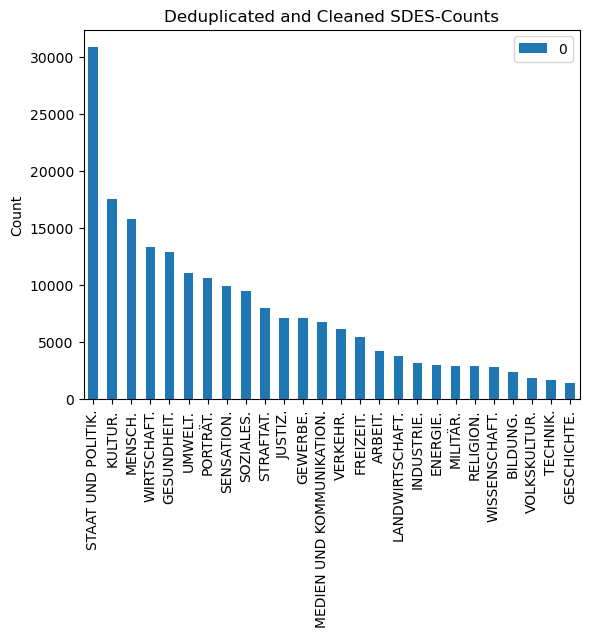

In [261]:
# Sum each column
column_sums = df_web_lvl_1[label_names].sum()

# Sort the sums
sorted_sums = pd.DataFrame(column_sums.sort_values(ascending=False))
sorted_sums

# Plot the results
sorted_sums.plot(kind='bar')
plt.title('Deduplicated and Cleaned SDES-Counts')
#plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()

In [262]:
df_web_lvl_1[label_names].sum()

ARBEIT.                       4233
BILDUNG.                      2373
ENERGIE.                      3025
FREIZEIT.                     5434
GESCHICHTE.                   1403
GESUNDHEIT.                  12874
GEWERBE.                      7096
INDUSTRIE.                    3180
JUSTIZ.                       7122
KULTUR.                      17545
LANDWIRTSCHAFT.               3798
MEDIEN UND KOMMUNIKATION.     6751
MENSCH.                      15788
MILITÄR.                      2903
PORTRÄT.                     10618
RELIGION.                     2861
SENSATION.                    9909
SOZIALES.                     9498
STAAT UND POLITIK.           30826
STRAFTAT.                     7976
TECHNIK.                      1671
UMWELT.                      11070
VERKEHR.                      6119
VOLKSKULTUR.                  1845
WIRTSCHAFT.                  13363
WISSENSCHAFT.                 2826
dtype: int64

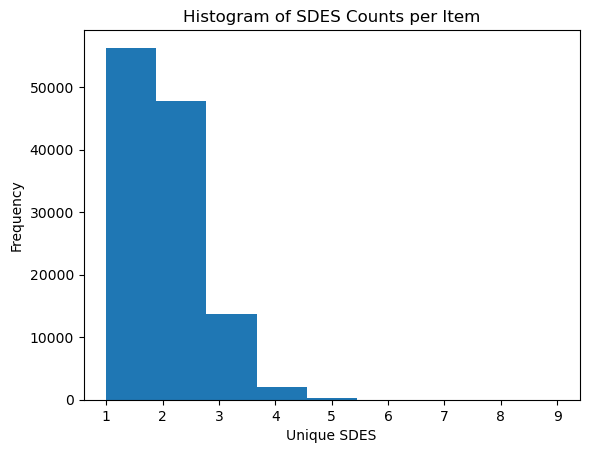

In [263]:
row_sums = df_web_lvl_1[label_names].sum(axis=1)

# Plot a histogram of the row sums
plt.hist(row_sums, bins=row_sums.max())  # 'auto' lets matplotlib decide the number of bins
plt.title('Histogram of SDES Counts per Item')
plt.xlabel('Unique SDES')
plt.ylabel('Frequency')
plt.show()

In [264]:
row_sums.mean()

1.6849551472304665

In [265]:
row_sums.median()

2.0

In [266]:
row_sums.std()

0.7573427733789804

### Test uniqueness

In [267]:
df_web_lvl_1['Item-WebCmsId'].nunique()

119948

## Final Data

- There will be two final datasets. One containing the full information and one where the data is sampled in order to increase class balance

In [268]:
df_web_lvl_1.columns[3:]

Index(['ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
       'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
       'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
       'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
       'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
       'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.'],
      dtype='object')

In [269]:
# Convert categories into a list
df_web_lvl_1['Categories'] = df_web_lvl_1[label_names].apply(lambda row: row.tolist(), axis=1)

In [270]:
df_web_lvl_1.shape

(119948, 30)

In [271]:
df_web_lvl_1.sample(10)

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,SOZIALES.,STAAT UND POLITIK.,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories
46244,Hausärztinnen und Hausärzte sollen das Impfen ...,A0AE9860-2EF5-40AB-AF7B-1F14DA2948A2,DA26FCC4-9313-45AF-9864-1C097A7A238A,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
87582,Schweizer Forscher verpflanzen erstmals Kunsth...,EFEFDFC6-A7DF-4FF0-BF3E-995C4DADB111,1EC2F70E-912B-46E0-B18E-75922E235879,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
98358,Tierfreundliche Ebermast: Ferkel leiden weiter...,24FC0E5A-274A-4D89-9409-6A9C4B534F7B,81BDC498-D8D7-40B6-A3D8-6DEE971D1BE4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
109730,Wetter 2010\nDas Wetter im Jahr 2010 war von E...,3721CE02-D6BC-452C-A2F5-485DDE5BF1F8,1D469821-E609-4AAD-818B-FFCA05F6438D,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
111140,Willkommen bei der SRF-Investigativ-Box\n,F2A9D3EF-59FA-426A-99EB-F99303B2787F,3DBA7989-9907-4A1C-9EAB-63F9387AB4EF,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
87304,"Schweizer Auswanderer: Ruanda, Spanien, Deutsc...",8C0D6805-E634-410C-B799-05B51A8664A9,3097882F-58BA-44E2-9293-F1ACDD0FB206,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
72547,Olympische Spiele finden nicht 2020 statt\nNeb...,FA8CD005-BBE4-4D99-B10C-69525481F359,82258A57-A57E-4F7C-817F-55BB77C05093,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97118,Task-Force des Bundes soll Blackouts verhinder...,14A2E501-2A74-4F8B-9BF9-1ED42B6DE166,7C895ACE-F821-4FF6-8C02-33C01124FC14,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
60377,Linthal 2015 - Grossbaustelle Pumpspeicherwerk...,E5C0757C-346D-44F5-93F0-F9D1641E6C9B,2B36A86B-73DD-4A28-B919-AA2BA5A22B54,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
60829,Long Covid – Wer bezahlt Medikamente und Thera...,64EAB555-E6B4-4C1E-ACA5-2D8E62A3D343,513812E6-8B40-46AA-8B93-AF9210F9B5C6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


### Full Dataset

In [272]:
df_web_lvl_1.to_pickle('../Daten/FINAL_faro_cleaned.pkl')

### Enthropy Minimized Data Set

This function can be used to analyze the diversity of label distributions in a machine learning classification dataset. High entropy would suggest that the dataset is balanced across different labels, which is generally desirable for training classification models. Conversely, low entropy might indicate an imbalance, suggesting the need for techniques like resampling to balance the dataset before training.

In [287]:
def categorical_entropy(df, labels=label_names):
    """
    Calculate the entropy of categorical labels in a DataFrame.

    Parameters:
    - df (DataFrame): The pandas DataFrame containing the dataset.
    - labels (list): A list of column names in the DataFrame that represent categorical labels.

    Returns:
    - float: The calculated entropy of the label distribution.

    Formula for entropy:
    H = -sum(p(l) * log2(p(l)))
    where p(l) is the probability of label l occurring in the dataset.
    """

    # Calculate the total number of occurrences for each label
    cat_sums = df[labels].sum()

    # Calculate the total occurrences of all labels combined
    total = cat_sums.sum()

    # Calculate the probability of each label (number of occurrences of each label / total occurrences)
    cat_probs = cat_sums / total
    print('Probability of each label:')
    print('   (number of occurrences of each label / total occurrences)')
    print(cat_probs.sort_values(ascending=False))
    
    # Calculate the entropy using the entropy formula:
    # Entropy = Sum of (probability of each label * -log2 of the probability of each label)
    entropy = -np.sum(cat_probs * np.log2(cat_probs))

    return f'Entropy: {entropy}'

To determine the maximum entropy for a set of categorical labels, where the maximum entropy occurs when all possible outcomes are equally likely, we first need to understand the nature of entropy and the specifics of your dataset.

### Understanding Maximum Entropy

**Entropy** is a measure of the uncertainty or unpredictability of a data source, calculated using the probabilities of the outcomes. For categorical data, the formula for entropy, \( H \), in a system with \( n \) outcomes is given by:

\[ H = -\sum_{i=1}^n p_i \log_2(p_i) \]

where \( p_i \) is the probability of the \( i \)-th outcome.

**Maximum entropy** occurs when all outcomes are equally likely. In such a case, the probabilities \( p_i \) for all labels are equal. For \( n \) equally likely outcomes, \( p_i = \frac{1}{n} \) for all \( i \). The entropy formula simplifies to:

\[ H = -n \left( \frac{1}{n} \log_2 \left(\frac{1}{n}\right) \right) = \log_2(n) \]

This means the maximum entropy for \( n \) categories is \( \log_2(n) \), which is achieved when each category is equally probable.

### Applying to Your Dataset

To achieve maximum entropy for 26 unique categories, each category would need to have an equal probability of occurring. This is a theoretical state where each category is equally likely, irrespective of the actual counts you provided.

### Calculating Maximum Entropy for 26 Labels

For your dataset with 26 unique labels, the maximum entropy would be:

\[ H_{max} = \log_2(26) \]

Let's compute that:

In [288]:
num_labels = len(label_names)  # As it seems there are 26 unique labels
max_entropy = np.log2(num_labels)
print(f"The maximum entropy for {num_labels} equally likely labels is: {max_entropy:.4f} bits")


The maximum entropy for 26 equally likely labels is: 4.7004 bits


In [289]:
-26 * (1/26 * np.log2(1/26))

4.700439718141092

In [290]:
1/26

0.038461538461538464

This computation will tell us the highest level of uncertainty possible with 26 labels, where each label has an equal chance of appearing. This theoretical maximum is useful for comparing against the actual entropy calculated from your data's distribution to understand how balanced or imbalanced your label distribution is relative to the most uncertain (balanced) state possible.

### Concliusion

If your entropy calculation from the actual data is close to this maximum, it suggests that your labels are relatively balanced. If it is much lower, it indicates a skewed distribution with some labels being much more frequent than others, which might necessitate resampling or other methods to balance the data before using it for training machine learning models.

### Enthropy for Full Dataset

In [291]:
categorical_entropy(df_web_lvl_1, labels = label_names)

Probability of each label:
   (number of occurrences of each label / total occurrences)
STAAT UND POLITIK.           0.152523
KULTUR.                      0.086810
MENSCH.                      0.078117
WIRTSCHAFT.                  0.066118
GESUNDHEIT.                  0.063699
UMWELT.                      0.054773
PORTRÄT.                     0.052537
SENSATION.                   0.049028
SOZIALES.                    0.046995
STRAFTAT.                    0.039464
JUSTIZ.                      0.035239
GEWERBE.                     0.035110
MEDIEN UND KOMMUNIKATION.    0.033403
VERKEHR.                     0.030276
FREIZEIT.                    0.026887
ARBEIT.                      0.020944
LANDWIRTSCHAFT.              0.018792
INDUSTRIE.                   0.015734
ENERGIE.                     0.014967
MILITÄR.                     0.014364
RELIGION.                    0.014156
WISSENSCHAFT.                0.013983
BILDUNG.                     0.011741
VOLKSKULTUR.                 0.009129


'Entropy: 4.288061472921206'

## Resampled Dataset

In [292]:
label_frequencies = df_web_lvl_1[label_names].sum().sort_values()

In [293]:
label_frequencies

GESCHICHTE.                   1403
TECHNIK.                      1671
VOLKSKULTUR.                  1845
BILDUNG.                      2373
WISSENSCHAFT.                 2826
RELIGION.                     2861
MILITÄR.                      2903
ENERGIE.                      3025
INDUSTRIE.                    3180
LANDWIRTSCHAFT.               3798
ARBEIT.                       4233
FREIZEIT.                     5434
VERKEHR.                      6119
MEDIEN UND KOMMUNIKATION.     6751
GEWERBE.                      7096
JUSTIZ.                       7122
STRAFTAT.                     7976
SOZIALES.                     9498
SENSATION.                    9909
PORTRÄT.                     10618
UMWELT.                      11070
GESUNDHEIT.                  12874
WIRTSCHAFT.                  13363
MENSCH.                      15788
KULTUR.                      17545
STAAT UND POLITIK.           30826
dtype: int64

In [294]:
min_label_count = label_frequencies.min()
min_label_count

1403

In [295]:
df = df_web_lvl_1

balanced_df = pd.DataFrame()

for label in label_names:
    # Filter rows where the current label is 1
    label_df = df[df[label] == 1]

    # Sampling
    if len(label_df) >= min_label_count:
        sampled_df = label_df.sample(n=min_label_count, random_state=42)
    else:
        # If less data than min_label_count, oversample with replacement
        sampled_df = label_df.sample(n=min_label_count, replace=True, random_state=42)

    # Append sampled data to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, sampled_df], ignore_index=True)

# Removing duplicates while retaining the index order
balanced_df = balanced_df.drop_duplicates(subset=['Web-Text', 'Item-WebCmsId', 'Program-WebCmsId']).reset_index(drop=True)

In [296]:
balanced_df.shape

(32799, 30)

In [297]:
balanced_df.head()

,Web-Text,Item-WebCmsId,Program-WebCmsId,ARBEIT.,BILDUNG.,ENERGIE.,FREIZEIT.,GESCHICHTE.,GESUNDHEIT.,GEWERBE.,...,SOZIALES.,STAAT UND POLITIK.,STRAFTAT.,TECHNIK.,UMWELT.,VERKEHR.,VOLKSKULTUR.,WIRTSCHAFT.,WISSENSCHAFT.,Categories
0,Kanton Neuenburg: Geld für Firmen die Arbeitsl...,EA6813CF-DD56-4DD0-87C6-73BC110095AA,A8613547-A3E2-4D81-91B8-7C5F3F2D5439,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Flüchtlinge sollen in der Schweiz arbeiten dür...,0A613907-A6DF-4861-9AFC-2EB288C03C32,ADAE6D37-23BB-4960-A51A-88EC2CD6D19B,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,Uber-Urteil zieht sich hin\nOb «Uber» ein Arbe...,5FCFADE8-EC82-4923-83E6-6ED1398C6E3D,87E2E34D-BF2E-4E02-A333-221C12F2D261,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,Probleme mit Billigcoiffeuren\nBilligcoiffeure...,9C7692CE-BB12-4124-9850-1240458CDD94,BF1F2044-73ED-472F-BEC3-A4118B3D977C,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Mindestlohninitiative soll Lohndruck ausgleich...,DD68BFAB-8119-4B26-A3B5-DC4F3C468340,713C4040-C93C-45EC-B810-08050E898100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


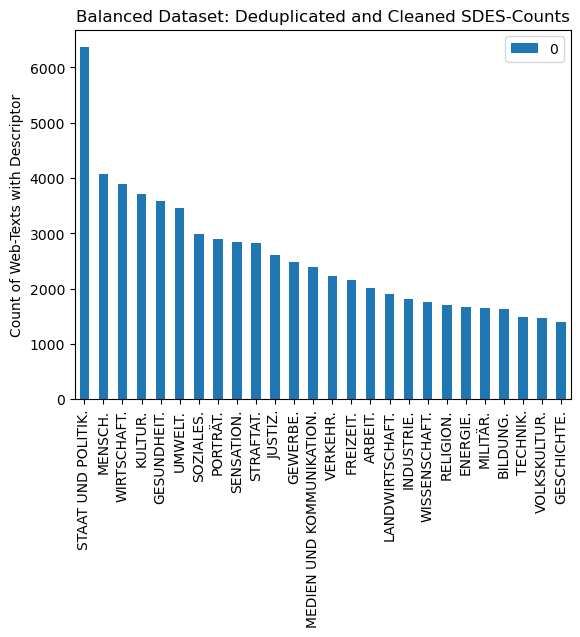

In [298]:
df_plot = pd.DataFrame(balanced_df[label_names].sum()).reset_index().sort_values(0, ascending=False)
# Plot the results
df_plot.plot(x='index', kind='bar')
plt.title('Balanced Dataset: Deduplicated and Cleaned SDES-Counts')
#plt.xlabel('Columns')
plt.ylabel('Count of Web-Texts with Descriptor')
plt.xlabel('')
plt.show()

In [299]:
categorical_entropy(balanced_df, labels = label_names)

Probability of each label:
   (number of occurrences of each label / total occurrences)
STAAT UND POLITIK.           0.095054
MENSCH.                      0.060736
WIRTSCHAFT.                  0.058093
KULTUR.                      0.055390
GESUNDHEIT.                  0.053583
UMWELT.                      0.051492
SOZIALES.                    0.044607
PORTRÄT.                     0.043368
SENSATION.                   0.042547
STRAFTAT.                    0.042173
JUSTIZ.                      0.039052
GEWERBE.                     0.037021
MEDIEN UND KOMMUNIKATION.    0.035781
VERKEHR.                     0.033347
FREIZEIT.                    0.032048
ARBEIT.                      0.029957
LANDWIRTSCHAFT.              0.028330
INDUSTRIE.                   0.026941
WISSENSCHAFT.                0.026164
RELIGION.                    0.025447
ENERGIE.                     0.024925
MILITÄR.                     0.024551
BILDUNG.                     0.024223
TECHNIK.                     0.022251


'Entropy: 4.584848748655336'

In [300]:
balanced_df.to_pickle('../Daten/FINAL_faro_cleaned_balanced.pkl')

## Test Label Probability

In [2]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [3]:
label_names = [
    'ARBEIT.', 'BILDUNG.', 'ENERGIE.', 'FREIZEIT.', 'GESCHICHTE.',
    'GESUNDHEIT.', 'GEWERBE.', 'INDUSTRIE.', 'JUSTIZ.', 'KULTUR.',
    'LANDWIRTSCHAFT.', 'MEDIEN UND KOMMUNIKATION.', 'MENSCH.', 'MILITÄR.',
    'PORTRÄT.', 'RELIGION.', 'SENSATION.', 'SOZIALES.',
    'STAAT UND POLITIK.', 'STRAFTAT.', 'TECHNIK.', 'UMWELT.', 'VERKEHR.',
    'VOLKSKULTUR.', 'WIRTSCHAFT.', 'WISSENSCHAFT.'
]
len(label_names)

26

In [4]:
df_0 = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_full.pkl')#.sample(10000)   

In [5]:
df_1 = pd.read_pickle('../Daten/FINAL_faro_cleaned_embeddings_balanced.pkl')#.sample(10000)   

In [42]:
from scipy.stats import skew
skew(df_0[df_0.columns[3:-3]].astype(int).sum(), axis=0, bias=True)

1.8233916356331277

In [43]:
skew(df_1[df_1.columns[3:-3]].astype(int).sum(), axis=0, bias=True)

1.5801725695016142

Probability based on column counts:

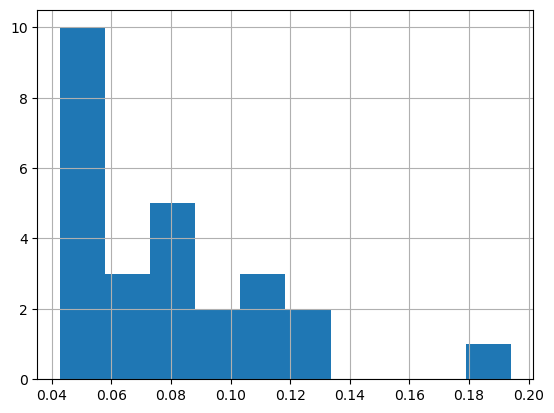

In [39]:
import matplotlib.pyplot as plt
(df_1[df_1.columns[3:-3]].astype(int).sum()/len(df_1)).hist(bins=10)
plt.show()

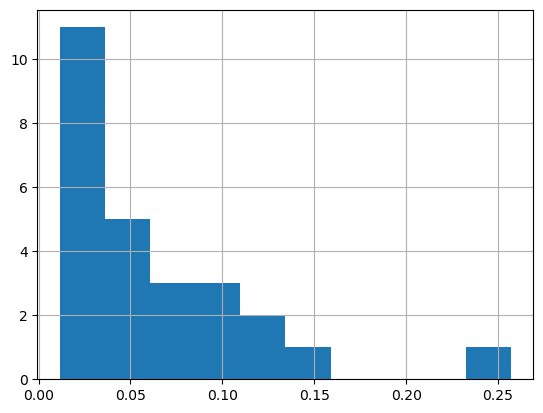

In [40]:
import matplotlib.pyplot as plt
(df_0[df_0.columns[3:-3]].astype(int).sum()/len(df_0)).hist(bins=10)
plt.show()

In [44]:
df_1[df_1.columns[3:-3]].astype(int).sum()/len(df_1)

ARBEIT.                      0.061160
BILDUNG.                     0.049453
ENERGIE.                     0.050886
FREIZEIT.                    0.065429
GESCHICHTE.                  0.042776
GESUNDHEIT.                  0.109394
GEWERBE.                     0.075582
INDUSTRIE.                   0.055002
JUSTIZ.                      0.079728
KULTUR.                      0.113083
LANDWIRTSCHAFT.              0.057837
MEDIEN UND KOMMUNIKATION.    0.073051
MENSCH.                      0.123998
MILITÄR.                     0.050123
PORTRÄT.                     0.088539
RELIGION.                    0.051953
SENSATION.                   0.086862
SOZIALES.                    0.091070
STAAT UND POLITIK.           0.194061
STRAFTAT.                    0.086100
TECHNIK.                     0.045428
UMWELT.                      0.105125
VERKEHR.                     0.068081
VOLKSKULTUR.                 0.044849
WIRTSCHAFT.                  0.118601
WISSENSCHAFT.                0.053416
dtype: float

In [45]:
df_0[df_0.columns[3:-3]].astype(int).sum()/len(df_0)

ARBEIT.                      0.035290
BILDUNG.                     0.019784
ENERGIE.                     0.025219
FREIZEIT.                    0.045303
GESCHICHTE.                  0.011697
GESUNDHEIT.                  0.107330
GEWERBE.                     0.059159
INDUSTRIE.                   0.026511
JUSTIZ.                      0.059376
KULTUR.                      0.146272
LANDWIRTSCHAFT.              0.031664
MEDIEN UND KOMMUNIKATION.    0.056283
MENSCH.                      0.131624
MILITÄR.                     0.024202
PORTRÄT.                     0.088522
RELIGION.                    0.023852
SENSATION.                   0.082611
SOZIALES.                    0.079184
STAAT UND POLITIK.           0.256995
STRAFTAT.                    0.066495
TECHNIK.                     0.013931
UMWELT.                      0.092290
VERKEHR.                     0.051014
VOLKSKULTUR.                 0.015382
WIRTSCHAFT.                  0.111407
WISSENSCHAFT.                0.023560
dtype: float

In [5]:
def stratified_random_baseline(actuals, num_simulations=1000):
    # Determine the number of samples and labels from the shape of the actuals array
    num_samples, num_labels = actuals.shape
    # Initialize a predictions array with zeros, shaped to store all simulations for all samples and labels
    predictions = np.zeros((num_simulations, num_samples, num_labels), dtype=int)
    
    # Loop through each label
    # Extract the unique values and their counts for the current label across all samples
    # Calculate the probability of each unique value based on its frequency
    # Generate predictions for the current label, for all simulations and all samples, based on the calculated probabilities
    for label_idx in range(num_labels):
        label_values = actuals[:, label_idx]
        unique, counts = np.unique(label_values, return_counts=True)
        probabilities = counts / counts.sum()
        print(f'Label: {label_names[label_idx]}, Prob 0: {probabilities[0]:.3f}, Prob 1: {probabilities[1]:.3f}')
        predictions[:, :, label_idx] = np.random.choice(unique, size=(num_simulations, num_samples), p=probabilities)
    
    # Calculate the accuracy for each simulation by comparing predictions with actual values across all labels and samples
    accuracies = (predictions == actuals).mean(axis=(1, 2))
    return accuracies.mean()

In [6]:
# Convert the list actuals to a numpy array and pass it to the function
stratified_random_accuracy = stratified_random_baseline(np.array(df_1['Categories'].tolist()))
# Print the calculated stratified random baseline accuracy as a percentage
print(f"Stratified Random Baseline Accuracy: {stratified_random_accuracy * 100:.2f}%")

Label: ARBEIT., Prob 0: 0.939, Prob 1: 0.061
Label: BILDUNG., Prob 0: 0.951, Prob 1: 0.049
Label: ENERGIE., Prob 0: 0.949, Prob 1: 0.051
Label: FREIZEIT., Prob 0: 0.935, Prob 1: 0.065
Label: GESCHICHTE., Prob 0: 0.957, Prob 1: 0.043
Label: GESUNDHEIT., Prob 0: 0.891, Prob 1: 0.109
Label: GEWERBE., Prob 0: 0.924, Prob 1: 0.076
Label: INDUSTRIE., Prob 0: 0.945, Prob 1: 0.055
Label: JUSTIZ., Prob 0: 0.920, Prob 1: 0.080
Label: KULTUR., Prob 0: 0.887, Prob 1: 0.113
Label: LANDWIRTSCHAFT., Prob 0: 0.942, Prob 1: 0.058
Label: MEDIEN UND KOMMUNIKATION., Prob 0: 0.927, Prob 1: 0.073
Label: MENSCH., Prob 0: 0.876, Prob 1: 0.124
Label: MILITÄR., Prob 0: 0.950, Prob 1: 0.050
Label: PORTRÄT., Prob 0: 0.911, Prob 1: 0.089
Label: RELIGION., Prob 0: 0.948, Prob 1: 0.052
Label: SENSATION., Prob 0: 0.913, Prob 1: 0.087
Label: SOZIALES., Prob 0: 0.909, Prob 1: 0.091
Label: STAAT UND POLITIK., Prob 0: 0.806, Prob 1: 0.194
Label: STRAFTAT., Prob 0: 0.914, Prob 1: 0.086
Label: TECHNIK., Prob 0: 0.955, Prob

In [10]:
# Convert the list actuals to a numpy array and pass it to the function
stratified_random_accuracy = stratified_random_baseline(np.array(df_0['Categories'].tolist()))
# Print the calculated stratified random baseline accuracy as a percentage
print(f"Stratified Random Baseline Accuracy: {stratified_random_accuracy * 100:.2f}%")

Label: ARBEIT., Prob 0: 0.965, Prob 1: 0.035
Label: BILDUNG., Prob 0: 0.980, Prob 1: 0.020
Label: ENERGIE., Prob 0: 0.975, Prob 1: 0.025
Label: FREIZEIT., Prob 0: 0.955, Prob 1: 0.045
Label: GESCHICHTE., Prob 0: 0.988, Prob 1: 0.012
Label: GESUNDHEIT., Prob 0: 0.893, Prob 1: 0.107
Label: GEWERBE., Prob 0: 0.941, Prob 1: 0.059
Label: INDUSTRIE., Prob 0: 0.973, Prob 1: 0.027
Label: JUSTIZ., Prob 0: 0.941, Prob 1: 0.059
Label: KULTUR., Prob 0: 0.854, Prob 1: 0.146
Label: LANDWIRTSCHAFT., Prob 0: 0.968, Prob 1: 0.032
Label: MEDIEN UND KOMMUNIKATION., Prob 0: 0.944, Prob 1: 0.056
Label: MENSCH., Prob 0: 0.868, Prob 1: 0.132
Label: MILITÄR., Prob 0: 0.976, Prob 1: 0.024
Label: PORTRÄT., Prob 0: 0.911, Prob 1: 0.089
Label: RELIGION., Prob 0: 0.976, Prob 1: 0.024
Label: SENSATION., Prob 0: 0.917, Prob 1: 0.083
Label: SOZIALES., Prob 0: 0.921, Prob 1: 0.079
Label: STAAT UND POLITIK., Prob 0: 0.743, Prob 1: 0.257
Label: STRAFTAT., Prob 0: 0.934, Prob 1: 0.066
Label: TECHNIK., Prob 0: 0.986, Prob